<a href="https://colab.research.google.com/github/tej-mahender/Crop_Recommendation/blob/main/notebook/cropRecommendation_yieldPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Smart Agriculture: Crop Recommendation & Yield Prediction**

**Abstract:**  This project leverages machine learning to support smart agriculture by recommending the most suitable crop based on environmental features and predicting crop yield from historical agricultural data.

Two ML models have been developed:
1. one for classification (crop recommendation)
2. another for regression (yield prediction)

The system aims to enhance agricultural decision-making for farmers, promoting sustainable farming aligned with the Sustainable Development Goals (SDGs).

#**1. Crop Recommendation Model**
**Overview:**
The Crop Recommendation Model aims to predict the most suitable crop to plant based on environmental and soil parameters such as nutrient content (N, P, K), temperature, humidity, pH, and rainfall. This assists farmers in making informed decisions to maximize yield and sustainability.

**Step 1: Importing Libraries**

**Purpose:** Import necessary Python libraries for data handling, visualization, machine learning, and evaluation.

**Why:** Efficient data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and ML model implementations (sklearn).

In [1]:
# Importing required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For Google Colab drive access
from google.colab import drive

# Scikit-learn libraries for model building, preprocessing, evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Import ML models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Step 2: Data Loading and Inspection**
*   Load the dataset from Google Drive.
*  Use .info(), .shape, .head(), .describe() to get an understanding of dataset size, data types, and summary statistics.

**Why:** This step helps identify data quality, data types, missing values, and the general structure before preprocessing.

In [2]:
# Mount Google Drive to access dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
crop = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')

In [4]:
# Basic info about dataset: types, non-null counts, memory usage
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# Check dataset shape (rows, columns)
crop.shape

(2200, 8)

In [6]:
# Display first 5 rows for preview
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
# Summary statistics of numerical columns
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


**Step 3: Data Cleaning and Preparation**
*   Rename target variable from '`label`' to '`crop`' for clarity.
*   Check for missing values and duplicates to ensure dataset integrity.

**Why:** Missing values and duplicates can negatively impact model performance and bias results.



In [8]:
# List all column names
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
# Rename target column 'label' to 'crop' for clarity
crop.rename(columns = {'label':'crop'}, inplace = True)

In [10]:
# Check for missing and duplicate values
print("Missing Values: ", crop.isnull().sum().sum())
print("Duplicate Entries: ", crop.duplicated().sum())

Missing Values:  0
Duplicate Entries:  0


In [11]:
# Display dataset
crop

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


**Step 4: Exploratory Data Analysis (EDA)**

* Analyze unique values and distribution of target labels.
* Visualize data distributions and correlations to understand feature relationships.

**Why:** Understanding data distribution guides feature selection and model choice.

In [12]:
# Checking unique values and data types for each column
for i in crop.columns:
    print("Column Name:", i.upper())
    print("No. of unique values: {}\n".format(crop[i].nunique()))
    # If column is categorical (string), print unique values
    if crop[i].dtype == 'object':
        print('Unique values:', pd.unique(crop[i]))


Column Name: N
No. of unique values: 137

Column Name: P
No. of unique values: 117

Column Name: K
No. of unique values: 73

Column Name: TEMPERATURE
No. of unique values: 2200

Column Name: HUMIDITY
No. of unique values: 2200

Column Name: PH
No. of unique values: 2200

Column Name: RAINFALL
No. of unique values: 2200

Column Name: CROP
No. of unique values: 22

Unique values: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [13]:
# Check distribution of target crop labels
crop['crop'].value_counts()

,count
crop,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


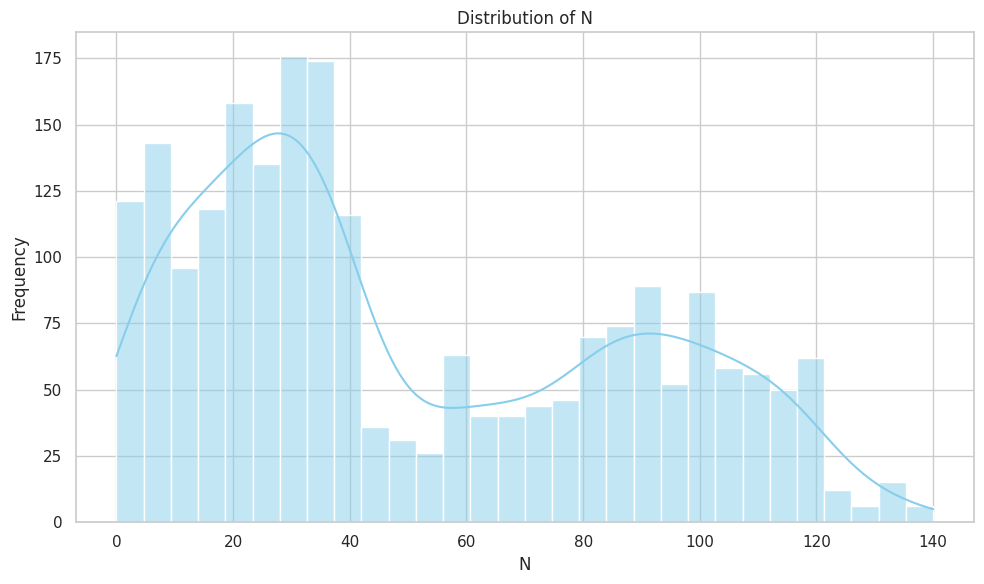

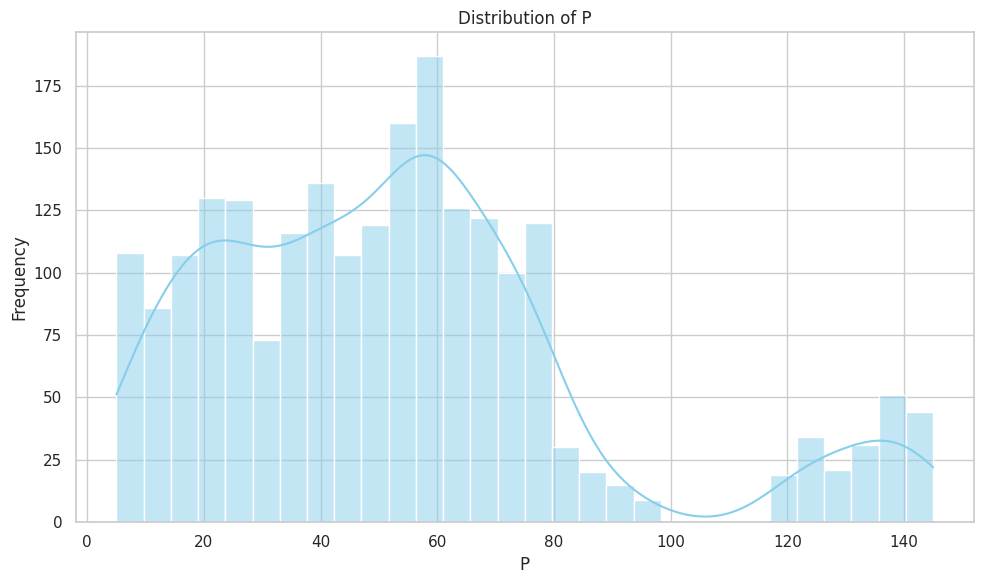

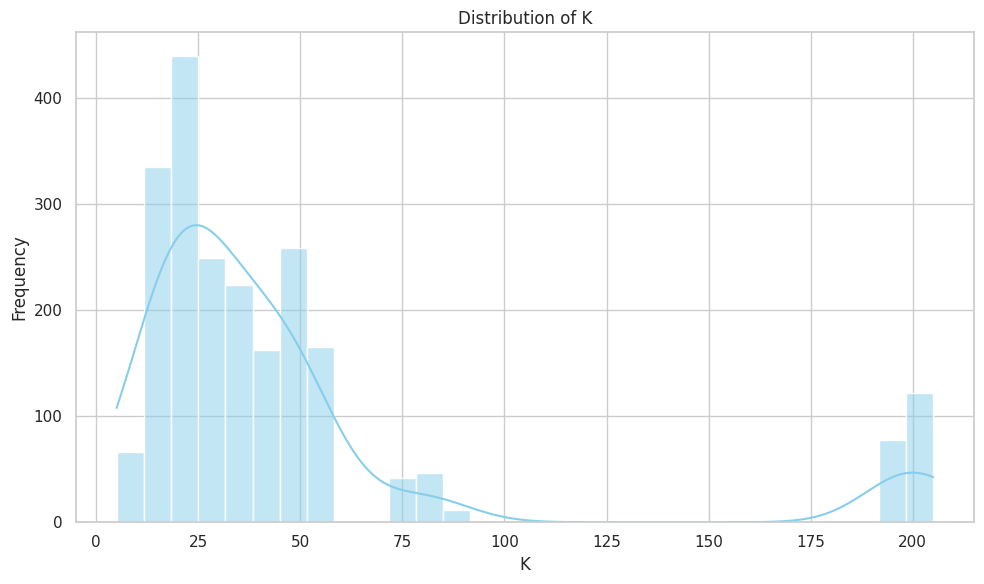

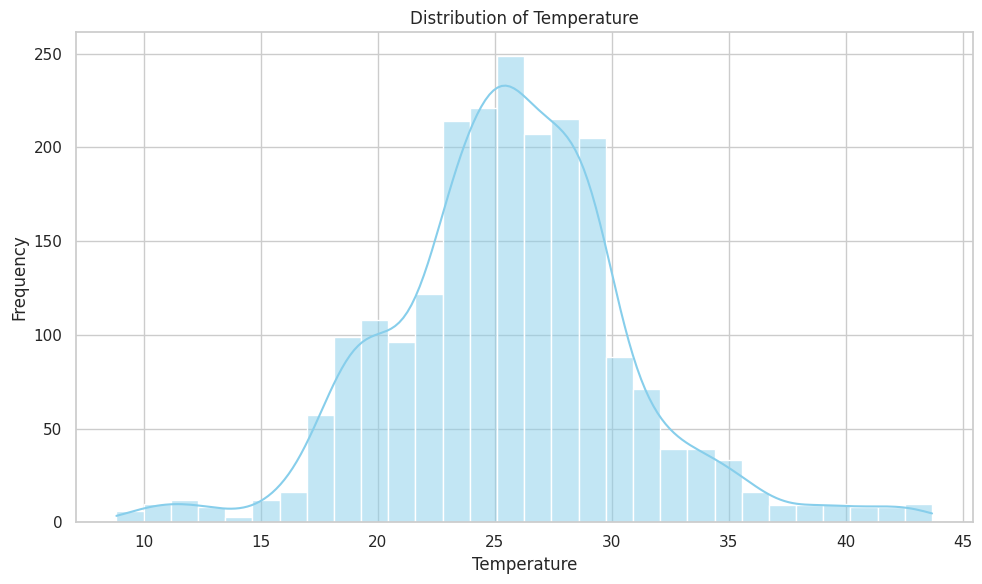

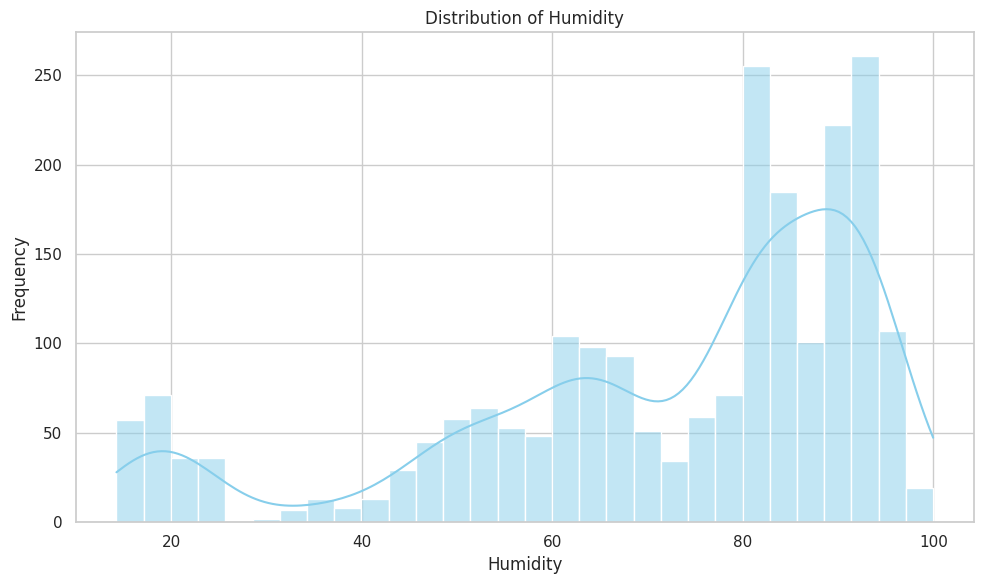

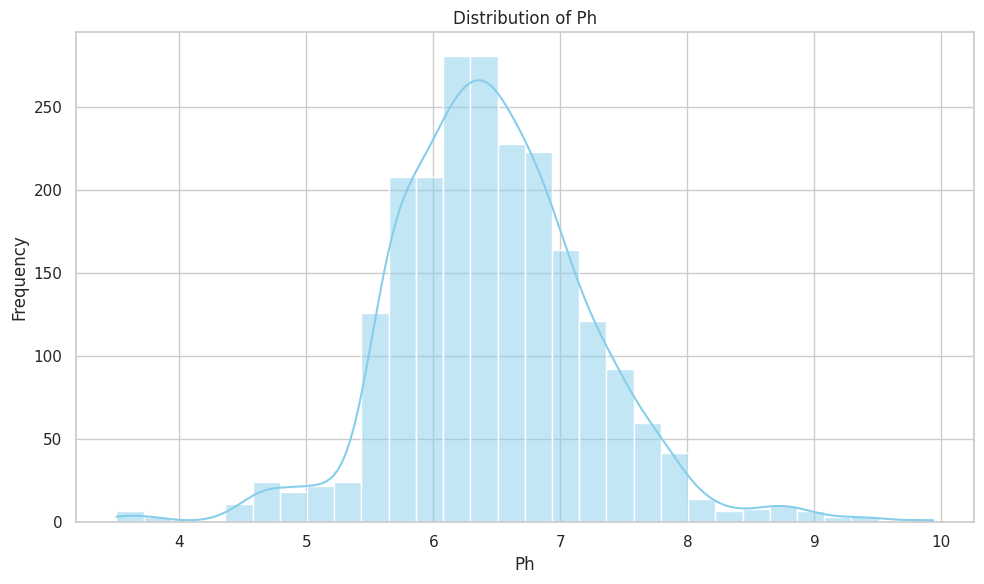

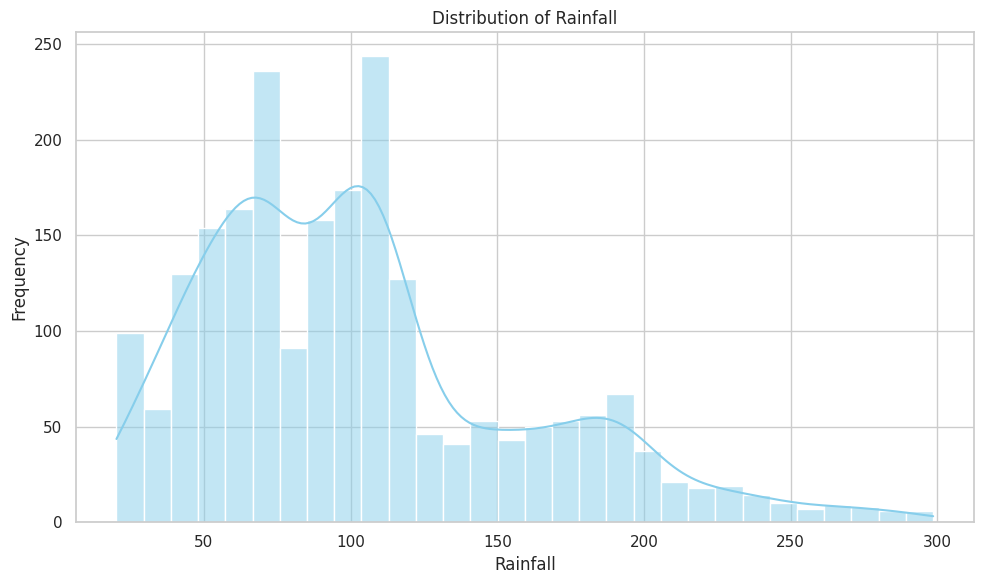

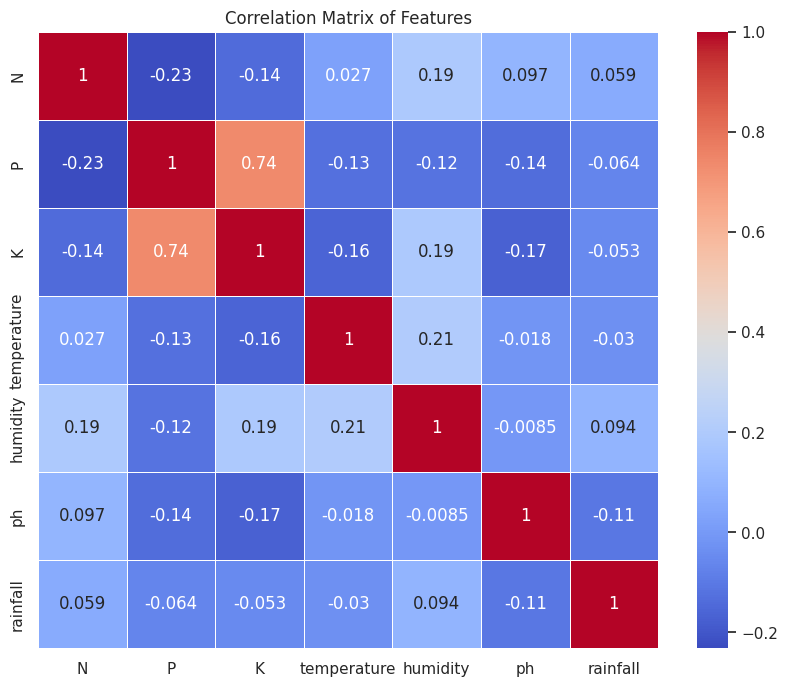

In [14]:
#Visualize Data Distributions and Correlations

# Set plot aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Visualizing the Distribution of Each Feature
# Plot histograms for all numeric columns to understand their distribution
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for feature in features:
    plt.figure()
    sns.histplot(crop[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Correlation Heatmap
# Calculate the correlation matrix to examine relationships between features
correlation_matrix = crop[features].corr()

# Plot the heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


**Step 5: Label Encoding of Target Variable**

* Encode categorical crop labels into numeric format using LabelEncoder.

**Why:** Machine learning models typically require numerical input for classification targets.

In [15]:
# Encode the categorical target variable into numeric labels for ML algorithms
label_encoder = LabelEncoder()
crop['crop_encoded'] = label_encoder.fit_transform(crop['crop'])
y_encoded = crop['crop_encoded']

In [16]:
# Map label names to their encoded integers for reference
classes = pd.DataFrame({'label': label_encoder.classes_, 'encoded': range(len(label_encoder.classes_))})
classes.set_index('label', inplace=True)
print(classes)

             encoded
label               
apple              0
banana             1
blackgram          2
chickpea           3
coconut            4
coffee             5
cotton             6
grapes             7
jute               8
kidneybeans        9
lentil            10
maize             11
mango             12
mothbeans         13
mungbean          14
muskmelon         15
orange            16
papaya            17
pigeonpeas        18
pomegranate       19
rice              20
watermelon        21


In [17]:
# Saving and downloading label encoder files for deployment
import pickle

# Save the trained model
with open('/content/label_encoder_crop.pkl', 'wb') as model_file:
    pickle.dump(label_encoder, model_file)
    print("✅ Label Encoder saved at: /content/label_encoder_crop.pkl")

classes.to_csv('label_encoder_crop_mapping.csv')
print("📄 Class mapping saved as 'label_encoder_crop_mapping.csv'")

# Download the pickle and scaler files
from google.colab import files
files.download('/content/label_encoder_crop.pkl')
files.download('label_encoder_crop_mapping.csv')

✅ Label Encoder saved at: /content/label_encoder_crop.pkl
📄 Class mapping saved as 'label_encoder_crop_mapping.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 6:** Feature and Target Variable Splitting
* Separate features (N, P, K, temperature, humidity, ph, rainfall) from the target (crop_encoded).

**Why:** ML algorithms require distinct input (features) and output (target) datasets.

In [18]:
# Separate features (X) and target (y)
x = crop.drop(columns=['crop','crop_encoded'])

In [19]:
# Display features
print(x)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]


In [20]:
#Display target
y_encoded

,crop_encoded
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


**Step 7: Train-Test Split**
* Split the dataset into training (80%) and testing (20%) subsets.

**Why:** To evaluate model generalization on unseen data and avoid overfitting.

In [21]:
# Split dataset into train and test sets (80% train, 20% test)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1760, 7)
x_test : (440, 7)
y_train : (1760,)
y_test : (440,)


**Step 8:** Feature Scaling
* Standardize feature variables to zero mean and unit variance using StandardScaler.

**Why:** Many ML algorithms perform better and converge faster when features are on the same scale.

In [22]:
# Scale features for better model performance (mean=0, std=1)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # Use transform only on test data

**Step 9: Model Selection, Training and Model Evaluation**
* Train multiple classification algorithms (Logistic Regression, Naive Bayes, SVM, KNN, Decision Tree, Random Forest).
* Predict on test data and evaluate using accuracy score and confusion matrix.
* Visualize confusion matrices to analyze prediction errors.

**Why:** Comparing different models helps identify the best-performing algorithm for the task.

Logistic Regression with accuracy: 0.9636


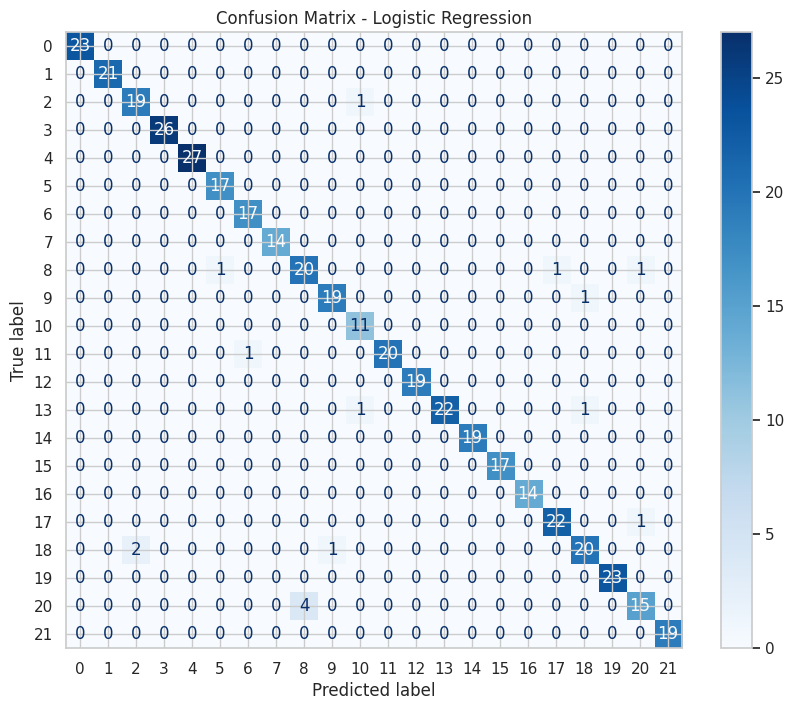

Naive Bayes with accuracy: 0.9955


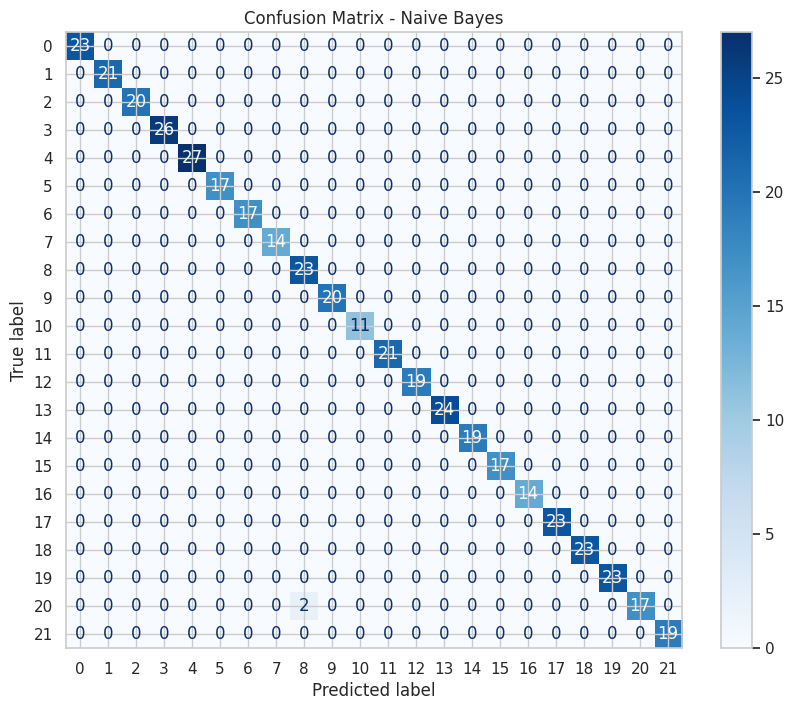

Support Vector Machine with accuracy: 0.9682


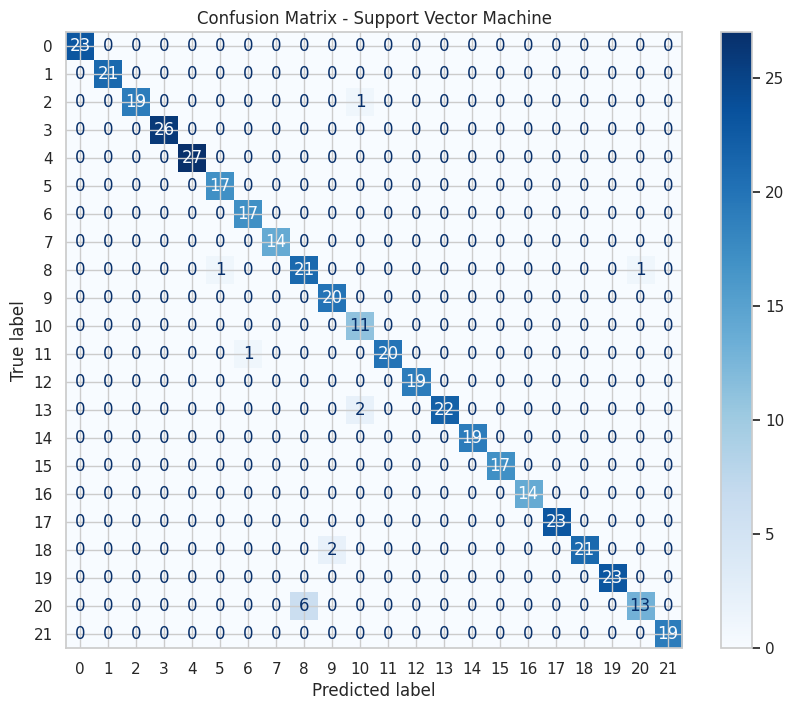

K-Nearest Neighbors with accuracy: 0.9568


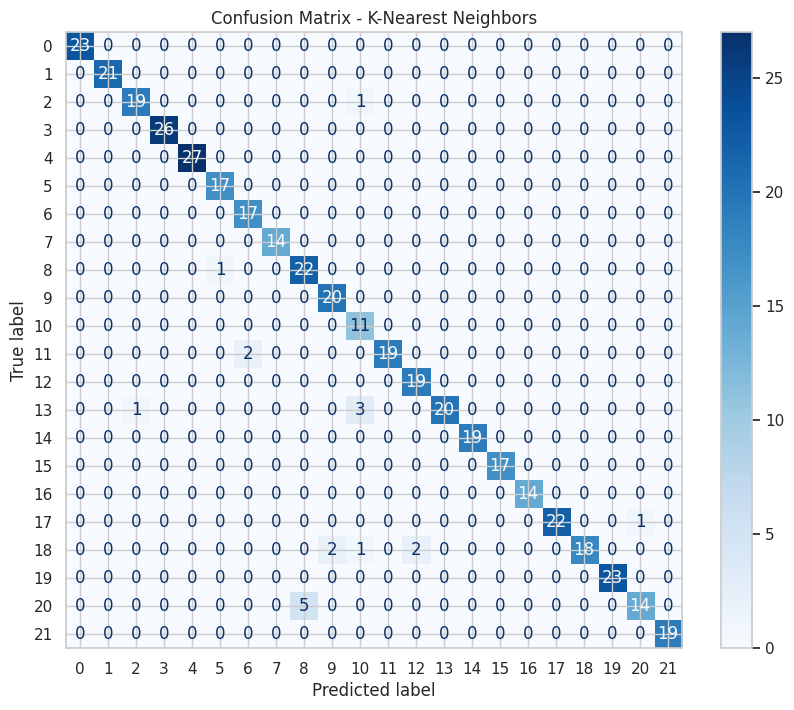

Decision Tree with accuracy: 0.9886


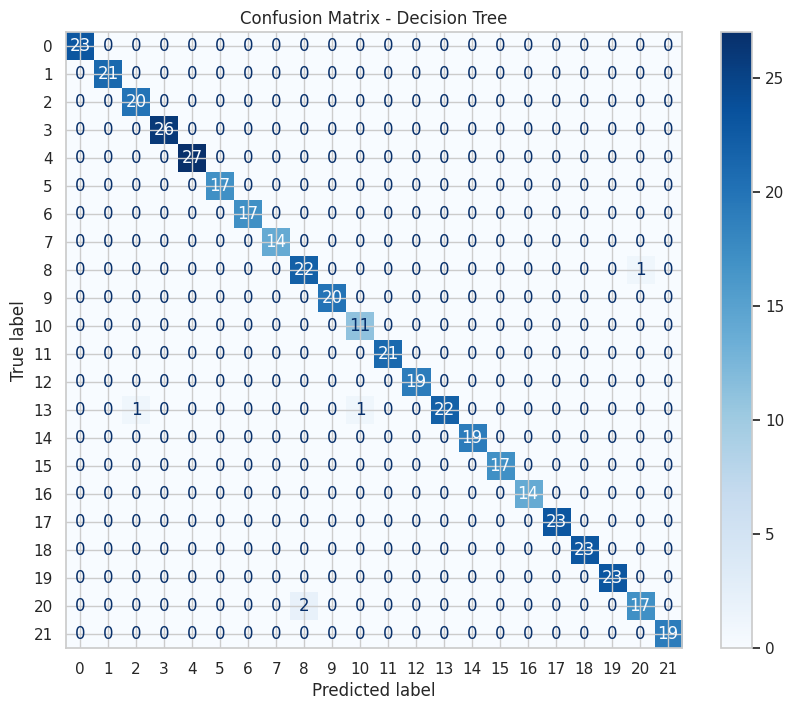

Random Forest with accuracy: 0.9932


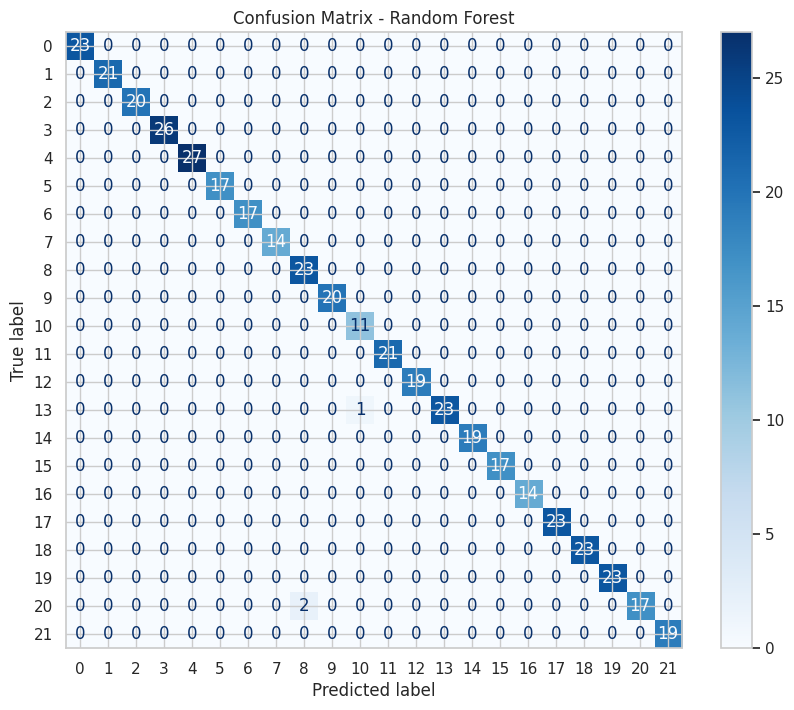

In [23]:
# Initialize dictionary of classification models to train
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

# Dictionary to store accuracy results for each model
accuracy_results = {}

# Train each model, predict on test set, calculate accuracy, and display confusion matrix
for name, model in models.items():
    model.fit(x_train, y_train)  # Train model
    y_pred = model.predict(x_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_results[name] = accuracy
    print(f"{name} with accuracy: {accuracy:.4f}")

    # cm = confusion_matrix(y_test, y_pred)

    # Generate confusion matrix plot
    fig, ax = plt.subplots(figsize=(10, 8))  # Set figure size
    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, ax=ax, cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    print("=" * 50)

**Step 10: Model Performance Comparison**
* Visualize accuracy scores of all models in a bar chart.

**Why:** Clear comparison allows selection of the best model (Random Forest here).

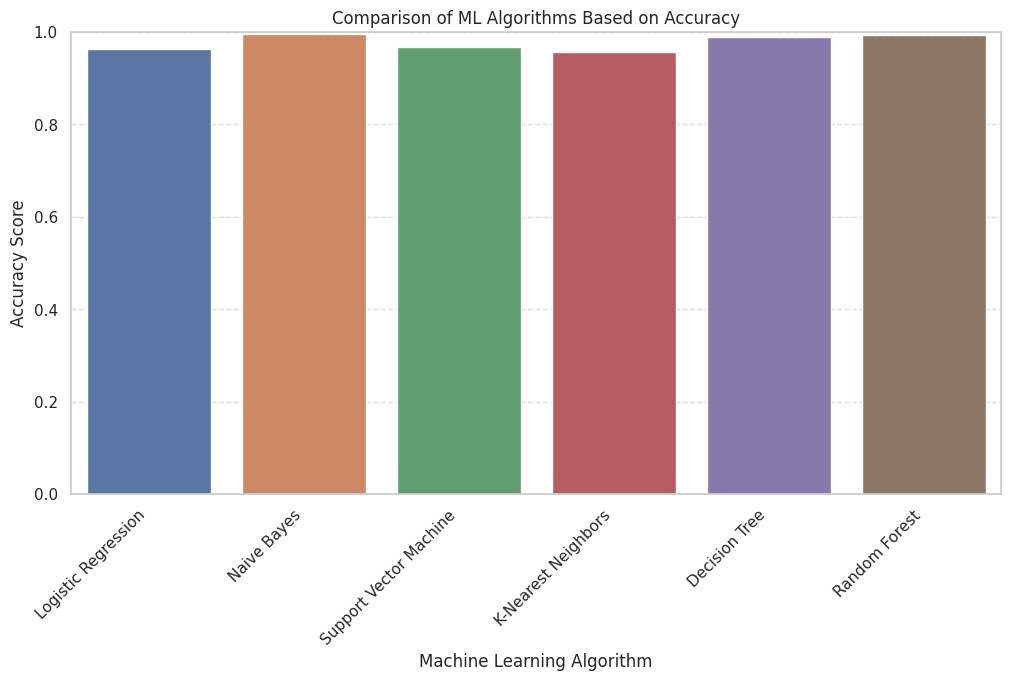

In [24]:
# Visualize accuracy comparison using bar chart
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Algorithm', 'Accuracy'])

# Set figure size
plt.figure(figsize=(12, 6))

# Create horizontal bar chart with proper hue setting
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df, hue='Algorithm', dodge=False, legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Labels and title
plt.ylabel("Accuracy Score")
plt.xlabel("Machine Learning Algorithm")
plt.title("Comparison of ML Algorithms Based on Accuracy")

# Set accuracy limits
plt.ylim(0, 1)  # Accuracy is between 0 and 1

# Add grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


**Step 11: Final Model Training and Detailed Evaluation**
* Retrain the best model (Random Forest) on the training set.
* Generate classification report (precision, recall, f1-score) and confusion matrix.
* Visualize predicted crop distribution using a pie chart.

**Why:** Confirm the model’s reliability and interpret the classification results.


✅ Final Model Accuracy (Random Forest): 0.9932

📊 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      o

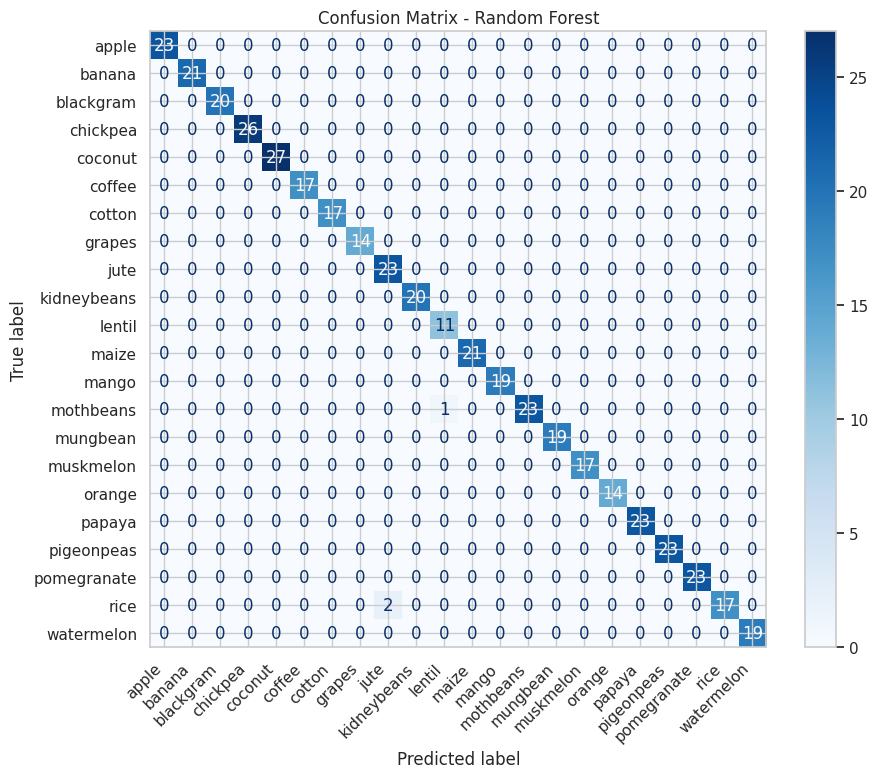

In [25]:
# Train final model - Random Forest with optimized parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

# Display final model accuracy and detailed classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Final Model Accuracy (Random Forest): {accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plot Confusion Matrix for Final Model
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(rf_model, x_test, y_test, ax=ax, cmap=plt.cm.Blues, display_labels=label_encoder.classes_)
plt.xticks(rotation=45, ha="right")
plt.title("Confusion Matrix - Random Forest")
plt.show()

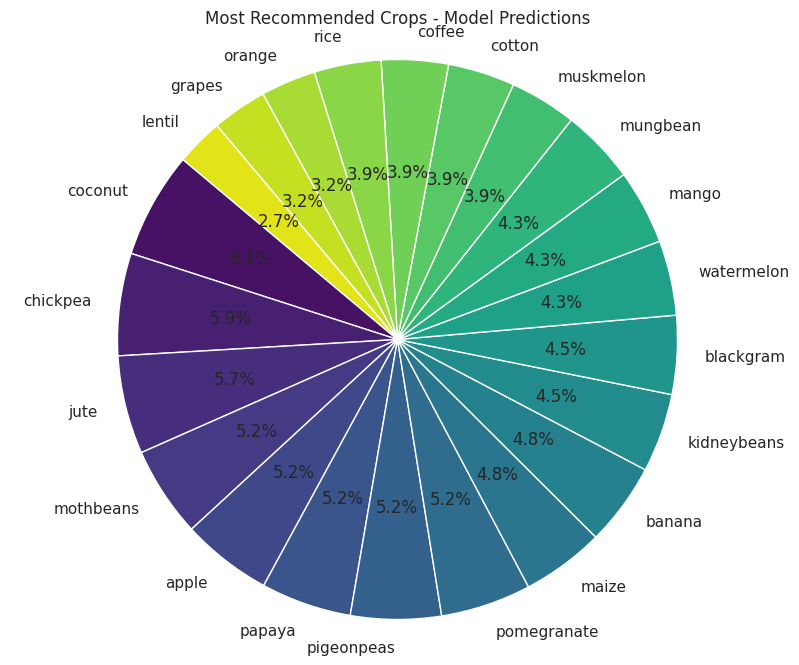

In [26]:
# Visualize distribution of predicted crops using pie chart

# Predict crops using the trained Random Forest model
y_pred = rf_model.predict(x_test)

# Convert encoded predictions back to crop names
predicted_crops = label_encoder.inverse_transform(y_pred)

# Count occurrences of each predicted crop
crop_counts = pd.Series(predicted_crops).value_counts()

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(crop_counts)))
plt.title("Most Recommended Crops - Model Predictions")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


**Step 12: Crop Recommendation Function**
* Interactive function that takes user input for soil and environmental parameters.
* Predicts and recommends the most suitable crop using the trained model.

**Why:** Provides practical application enabling users/farmers to get crop suggestions in real-time.

In [ ]:
# Function to recommend crop based on user input features
def recommend_crop():
    print("\n🌱 Enter the following values for crop recommendation 🌱\n")

    try:
        # Prompt user for input features
        N = float(input("Nitrogen (N): "))
        P = float(input("Phosphorus (P): "))
        K = float(input("Potassium (K): "))
        temperature = float(input("Temperature (°C): "))
        humidity = float(input("Humidity (%): "))
        ph = float(input("pH Level: "))
        rainfall = float(input("Rainfall (mm): "))

        # Prepare input in proper format
        user_input = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

        # Convert user input to DataFrame with correct column names
        user_input_df = pd.DataFrame(user_input, columns=x.columns)

        # Scale user input using previously fitted scaler
        user_input_scaled = scaler.transform(user_input_df)

        # Predict crop label
        predicted_label = rf_model.predict(user_input_scaled)
        crop = label_encoder.inverse_transform(predicted_label)[0]

        print(f"\n✅ Recommended Crop: {crop} 🌾")

    except ValueError:
        print("\n❌ Invalid input! Please enter numerical values only.")

# Call the function to test (uncomment below to run in an interactive environment)
recommend_crop()



🌱 Enter the following values for crop recommendation 🌱

Nitrogen (N): 10
Phosphorus (P): 20
Potassium (K): 30
Temperature (°C): 35
Humidity (%): 60
pH Level: 6.5
Rainfall (mm): 99

✅ Recommended Crop: mango 🌾


**Step 13:** Saving Crop Recommendation Model
* Save the trained Random Forest model and scaler to disk using pickle.

**Why:** Persist models for future use without retraining, enabling deployment and integration.

In [ ]:
# Saving the trained recommendation model using pickle for later use

import pickle

# Reassign for clarity and later saving
crop_recommendation = rf_model

# Save the trained model
with open('/content/crop_recommendation_model.pkl', 'wb') as model_file:
    pickle.dump(crop_recommendation, model_file)

print("✅ Model saved at: /content/crop_recommendation_model.pkl")

# Save scaler as well
with open('scaler_crop_recommendation.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Download the pickle and scaler files
from google.colab import files
files.download('/content/crop_recommendation_model.pkl')
files.download('scaler_crop_recommendation.pkl')

✅ Model saved at: /content/crop_recommendation_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 14:** Companion Crop Recommendation via Clustering
* Use KMeans clustering on feature data to identify clusters of compatible crops.
* Recommend companion crops within the same cluster.

**Why:** Companion planting improves crop health and yield by identifying synergistic crop combinations.

In [27]:
data = crop

In [28]:
# Companion Crop Recommendation using Clustering
from sklearn.cluster import KMeans

# Prepare data by removing target label for clustering
companion_data = data.drop(['crop'], axis=1)
crop_labels = data['crop']

# Apply KMeans clustering to group crops based on features
kmeans = KMeans(n_clusters=4, random_state=0)  # Adjust clusters based on dataset
kmeans.fit(companion_data)

# Assign cluster labels back to dataframe
data['cluster'] = kmeans.labels_

# Function to recommend companion crops based on cluster
def recommend_companion(crop_name):
    cluster_id = data[data['crop'] == crop_name]['cluster'].values[0]
    companion_crops = data[data['cluster'] == cluster_id]['crop'].unique()
    companions = [crop for crop in companion_crops if crop != crop_name]
    return companions

# Example Usage
crop_to_check = 'rice'
print(f"Companion crops for {crop_to_check}: {recommend_companion(crop_to_check)}")


Companion crops for rice: ['pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']


In [29]:
#User-facing function to run the prediction system
def run_companion_recommendation():
    print("\033[1m🌾 Companion Crop Recommendation System 🌾\033[0m\n")
    crop_input = input("Enter the crop name: ").strip().lower()

    companions = recommend_companion(crop_input)

    if companions:
        print(f"\n\033[1m🌿 Companion crops for '{crop_input}':\033[0m")
        for crop in companions:
            print(f"  ✅ {crop}")
    else:
        print("\033[1m⚠️ No companion crops found.\033[0m")

# 🧪 Example Run
run_companion_recommendation()

🌾 Companion Crop Recommendation System 🌾

Enter the crop name: mango

🌿 Companion crops for 'mango':
  ✅ maize
  ✅ chickpea
  ✅ kidneybeans
  ✅ pigeonpeas
  ✅ mothbeans
  ✅ mungbean
  ✅ blackgram
  ✅ lentil
  ✅ pomegranate
  ✅ orange
  ✅ papaya
  ✅ coconut


In [ ]:
# Save trained Companion model
import pickle

# Save the trained KMeans model
with open('/content/companion_crop_kmeans.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

# Save the fitted scaler
with open('companion_crop_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\n✅ Model and Scaler saved successfully!")

# Download the pickle and scaler files
from google.colab import files

files.download('/content/companion_crop_kmeans.pkl')
files.download('companion_crop_scaler.pkl')


✅ Model and Scaler saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**2. Yield Prediction Model**
**Overview:**
The Yield Prediction Model estimates crop production quantity based on historical production data and factors such as year, season, crop type, and cultivated area. This helps in forecasting and planning agricultural outputs.

**Step 1: Importing Libraries**
**Purpose:** Import necessary Python libraries for data handling, visualization, machine learning, and evaluation.

**Why:** Efficient data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and ML model implementations (sklearn).

In [30]:
# Import libraries for data handling, visualization and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules for model building and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

**Step 2: Data Loading and Cleaning**
* Load crop production dataset.
* Normalize crop names (lowercase, fixing inconsistencies).
* Filter to selected crops relevant for analysis.
* Remove unnecessary columns (State_Name, District_Name).
* Use .info(), .shape, .head(), .describe() to get an understanding of dataset size, data types, and summary statistics.
* Handle missing values by dropping.

**Why:** Ensures clean, consistent data that improves model accuracy.

In [31]:
# Load crop production dataset
crop_data = pd.read_csv("/content/drive/MyDrive/crop_production.csv")

# Normalize crop names by converting to lowercase and fixing inconsistent naming
crop_data['Crop'] = crop_data['Crop'].str.lower()
crop_data['Crop'] = crop_data['Crop'].replace(
    ['moth', 'peas  (vegetable)', 'bean', 'moong(green gram)', 'pome granet',
     'water melon', 'cotton(lint)', 'gram'],
    ['mothbeans', 'pigeonpeas', 'kidneybeans', 'mungbean', 'pomegranate',
     'watermelon', 'cotton', 'chickpea'])

# Select subset of crops relevant for prediction
selected_crops = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
                  'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
                  'banana', 'mango', 'grapes', 'watermelon', 'apple',
                  'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
crop_data = crop_data[crop_data['Crop'].isin(selected_crops)]

# Drop irrelevant columns like state and district names
crop_data = crop_data.drop(['State_Name', 'District_Name'], axis=1)

In [32]:
# Check dataset shape (rows, columns)
crop_data.shape

(58461, 5)

In [33]:
# Display first 5 rows for preview
crop_data.head()

,Crop_Year,Season,Crop,Area,Production
2,2000,Kharif,rice,102.0,321.00
3,2000,Whole Year,banana,176.0,641.00
12,2001,Kharif,rice,83.0,300.00
18,2002,Kharif,rice,189.2,510.84
20,2002,Whole Year,banana,213.0,1278.00


In [34]:
# Basic info about dataset: types, non-null counts, memory usage
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58461 entries, 2 to 246089
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crop_Year   58461 non-null  int64  
 1   Season      58461 non-null  object 
 2   Crop        58461 non-null  object 
 3   Area        58461 non-null  float64
 4   Production  57565 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.7+ MB


In [35]:
# Summary statistics of numerical columns
crop_data.describe()

,Crop_Year,Area,Production
count,58461.000000,58461.000000,5.756500e+04
mean,2005.755119,21056.352565,4.596474e+04
std,5.018032,48398.529629,1.275836e+05
min,1997.000000,1.000000,0.000000e+00
25%,2002.000000,154.000000,1.890000e+02
50%,2006.000000,1800.000000,2.958000e+03
75%,2010.000000,15370.000000,2.670100e+04
max,2015.000000,687000.000000,2.589591e+06


In [36]:
# List all column names
crop_data.columns

Index(['Crop_Year', 'Season', 'Crop', 'Area', 'Production'], dtype='object')

In [37]:
# Check and remove missing values
crop_data.isnull().sum()
crop_data = crop_data.dropna()

In [38]:
# Check for duplicate rows
crop_data.duplicated().sum()

np.int64(1919)

In [ ]:
# # Handle missing values
# crop_data = crop_data.dropna()

**Step 3: Encoding Categorical Variables**
* Encode categorical features Season and Crop to numeric labels.

**Why:** Most regression algorithms require numeric input for features.

In [39]:
# Encode categorical variables (Season and Crop) to numeric labels
label_encoders = {}
categorical_cols = ['Season', 'Crop']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    crop_data[col] = label_encoders[col].fit_transform(crop_data[col])

In [40]:
# Saving and downloading label encoder files for deployment
import pickle
from google.colab import files

# Save all label encoders in one file
filename = 'label_encoders_yield.pkl'
with open(filename, 'wb') as f:
    pickle.dump(label_encoders, f)
print(f"✅ All Label Encoders saved in {filename}")

# Download the single pickle file
files.download(filename)


✅ All Label Encoders saved in label_encoders_yield.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 4: Feature and Target Definition**
* Define features (Crop_Year, Season, Crop, Area) and target variable (Production).

**Why:** Isolate inputs and outputs for supervised learning.

In [41]:
# Define features and target
X = crop_data.drop(["Production"], axis=1)
y = crop_data["Production"]

In [42]:
#Display features
X

,Crop_Year,Season,Crop,Area
2,2000,1,18,102.0
3,2000,4,1,176.0
12,2001,1,18,83.0
18,2002,1,18,189.2
20,2002,4,1,213.0
...,...,...,...,...
246072,2014,2,3,198.0
246078,2014,2,13,64.0
246085,2014,3,10,325.0
246086,2014,3,18,306.0


In [43]:
#Display target
y

,Production
2,321.00
3,641.00
12,300.00
18,510.84
20,1278.00
...,...
246072,203.00
246078,40.00
246085,2039.00
246086,801.00


**Step 5: Train-Test Split**
* Split data into 80% training and 20% testing.

**Why:** To validate model performance on unseen data.

In [44]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print("x_train :",X_train.shape)
print("x_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (46052, 4)
x_test : (11513, 4)
y_train : (46052,)
y_test : (11513,)


**Step 6: Feature Scaling**
* Standardize feature variables to zero mean and unit variance using StandardScaler.

**Why:** Many ML algorithms perform better and converge faster when features are on the same scale.

In [45]:
# Standardize feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Step 7: Model Training and Evaluation**
* Train Random Forest and Decision Tree Regressors.
* Use standardization for Decision Tree inputs.
* Calculate R², Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).
* Visualize R² scores for comparison.

**Why:** Compare two popular regression algorithms to find the better model and Quantify prediction accuracy and error for regression tasks.

In [ ]:
# Train Random Forest Regressor
print("Training Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest performance
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("\nRandom Forest Results:")
print(f"  R2 Score: {rf_r2:.4f}")
print(f"  Mean Absolute Error: {rf_mae:.2f}")
print(f"  Root Mean Squared Error: {rf_rmse:.2f}")

# # Cross-validation
# rf_cv = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='r2').mean()
# print(f"  Cross-validation R2: {rf_cv:.4f}")
# print("-" * 50)

Training Random Forest Regressor...

Random Forest Results:
  R2 Score: 0.8474
  Mean Absolute Error: 16330.54
  Root Mean Squared Error: 50668.44


In [ ]:
# Scale data for Decision Tree
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train Decision Tree Regressor
print("Training Decision Tree Regressor...")
dt_model = DecisionTreeRegressor(random_state=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Evaluate Decision Tree performance
dt_r2 = r2_score(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))

print("\nDecision Tree Results:")
print(f"  R2 Score: {dt_r2:.4f}")
print(f"  Mean Absolute Error: {dt_mae:.2f}")
print(f"  Root Mean Squared Error: {dt_rmse:.2f}")

Training Decision Tree Regressor...

Decision Tree Results:
  R2 Score: 0.6983
  Mean Absolute Error: 20868.70
  Root Mean Squared Error: 71248.21


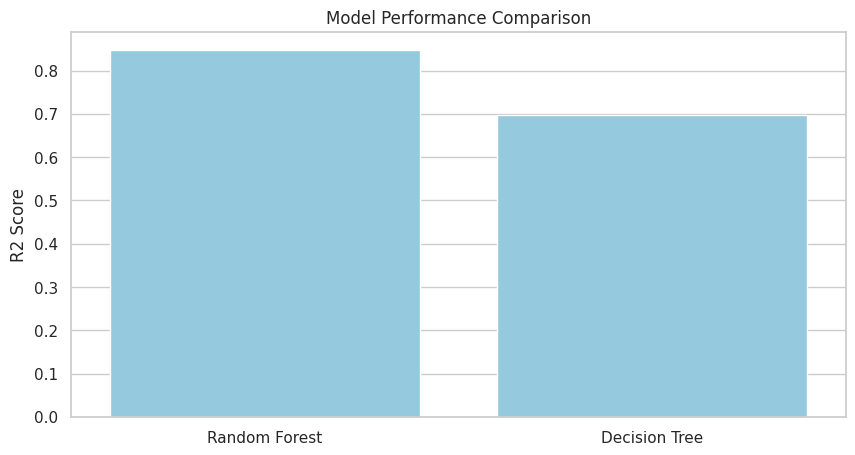

In [ ]:
# Visualize and compare model performances using R2 score
models = ["Random Forest", "Decision Tree"]
r2_scores = [rf_r2, dt_r2]


plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=r2_scores, color="skyblue")
plt.ylabel("R2 Score")
plt.title("Model Performance Comparison")
plt.show()

**Step 8: Yield Prediction Function**
* Interactive function that accepts user inputs (year, season, crop, area).
* Validates inputs against known categories.
* Predicts and outputs estimated crop production.

**Why:** Allows users to estimate crop yield for planning and management.

In [ ]:
# Clean up label encoder classes (remove trailing spaces)
label_encoders['Season'].classes_ = np.array([s.strip() for s in label_encoders['Season'].classes_])
label_encoders['Crop'].classes_ = np.array([c.strip() for c in label_encoders['Crop'].classes_])

# Function for yield prediction based on user input
def predict_yield():
    # Get user input
    crop_year = int(input("Enter Crop Year (e.g., 2024): "))
    season = input("Enter Season (e.g., Kharif, Rabi, Summer, Whole Year): ").strip()
    crop = input("Enter Crop Name (e.g., Rice, Maize, Wheat): ").strip().lower()
    area = float(input("Enter Area in hectares: "))

    # Validate input against known classes
    if season not in label_encoders['Season'].classes_:
        print(f"❌ Error: '{season}' is not a valid season!")
        print(f"✅ Available options: {list(label_encoders['Season'].classes_)}")
        return

    if crop not in label_encoders['Crop'].classes_:
        print(f"❌ Error: '{crop}' is not a valid crop!")
        print(f"✅ Available options: {list(label_encoders['Crop'].classes_)}")
        return

    # Encode categorical inputa
    season_encoded = label_encoders['Season'].transform([season])[0]
    crop_encoded = label_encoders['Crop'].transform([crop])[0]

    # Prepare feature vector
    input_data = np.array([[crop_year, season_encoded, crop_encoded, area]])

    # Scale features
    input_scaled = scaler.transform(input_data)

    # Predict yield using Random Forest model
    predicted_yield = rf_model.predict(input_scaled)
    print(f"\n🌾 Estimated Crop Production: {predicted_yield[0]:.2f} metric tons")

# Run prediction system
predict_yield()


Enter Crop Year (e.g., 2024): 2024
Enter Season (e.g., Kharif, Rabi, Summer, Whole Year): Summer
Enter Crop Name (e.g., Rice, Maize, Wheat): Rice
Enter Area in hectares: 40

🌾 Estimated Crop Production: 1060666.63 metric tons


**Step 9: Model Saving**
* Save trained Random Forest model and scaler using pickle.

**Why:** Enables model reuse without retraining, supports deployment.

In [ ]:
# Save trained yield prediction model using pickle
import pickle

yield_prediction = rf_model
with open('/content/yield_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(yield_prediction, model_file)

print("✅ Model saved at: /content/yield_prediction_model.pkl")

# Save the scaler as well
with open('yield_prediction_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Download the pickle and scaler files
from google.colab import files
files.download('/content/yield_prediction_model.pkl')
files.download('yield_prediction_scaler.pkl')

✅ Model saved at: /content/yield_prediction_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>